In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

all_df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_eval_22june/adaptive_speak_eval_all_v15.csv', on_bad_lines='skip')
print('target domain   :', all_df['target domain'].unique())
print('listener domain :', all_df['listener domain'].unique())
print('simulator domain:', all_df['simulator domain'].unique())

df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_eval_22june/adaptive_speak_eval_food_v2.csv')
print('target domain   :', df['target domain'].unique())
print('listener domain :', df['listener domain'].unique())
print('simulator domain:', df['simulator domain'].unique())

In [2]:
_df = pd.concat([
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_test_out_domain_22sept/appliances.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_test_out_domain_22sept/food.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_indoor.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_outdoor.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_vehicles.csv', error_bad_lines=False, warn_bad_lines=True)
])

# pd.to_numeric(df['target domain'], errors='coerce')

print('target domain   :', _df['target domain'].unique())
print('listener domain :', _df['listener domain'].unique())
print('simulator domain:', _df['interpreter domain'].unique())
_df = _df.dropna()
print('Data points:', len(_df))

id_df = _df[(_df['target domain'] == _df['listener domain'])]
ood_df = _df[(_df['target domain'] != _df['listener domain'])]

df = ood_df
df.head(5)

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_1745/2762750647.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_test_out_domain_22sept/appliances.csv', error_bad_lines=False, warn_bad_lines=True),
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_1745/2762750647.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_test_out_domain_22sept/appliances.csv', error_bad_lines=False, warn_bad_lines=True),
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_1745/2762750647.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.

target domain   : ['food' 'vehicles' 'outdoor' 'indoor' 'appliances']
listener domain : ['appliances' 'food']
simulator domain: ['appliances' 'food']
Data points: 6431


,Unnamed: 0,target domain,listener domain,interpreter domain,target img idx,img path #0,img path #1,img path #2,img path #3,img path #4,...,adapted_acc_s0,adapted_acc_s1,adapted_acc_s2,adapted_acc_s3,adapted_acc_s4,int_list_acc0,int_list_acc1,int_list_acc2,int_list_acc3,int_list_acc4
0,0,food,appliances,appliances,3,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,1,food,appliances,appliances,1,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,2,food,appliances,appliances,1,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,4,food,appliances,appliances,0,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,5,food,appliances,appliances,5,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [3]:
N_STEPS = 5
print('Representations')
for n in range(N_STEPS):
    print(f's{n}:', len(df[df['original h0'] != df[f'adapted h0 s{n}']]), '/', len(df))

print('Utterances')
for n in range(N_STEPS):
    print(f's{n}:', len(df[df['original utt'] != df[f'adapted utt s{n}']]), '/', len(df))
    if n > 0:
        print(f's{n-1} -> s{n}:', len(df[df[f'adapted utt s{n}'] != df[f'adapted utt s{n-1}']]))
    else:
        print(f'orig -> s{n}:', len(df[df[f'adapted utt s{n}'] != df['original utt']]))

Representations
s0: 5932 / 5932
s1: 5932 / 5932
s2: 5932 / 5932
s3: 5932 / 5932
s4: 5932 / 5932
Utterances
s0: 5932 / 5932
orig -> s0: 5932
s1: 5932 / 5932
s0 -> s1: 377
s2: 5932 / 5932
s1 -> s2: 348
s3: 5932 / 5932
s2 -> s3: 401
s4: 5932 / 5932
s3 -> s4: 431


## Diagnostic classification

In [7]:
CLF_TYPE = 'logistic'


In [4]:
def train_and_classify(X, Y, classifier_type='LR'):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1)
    # print(f'X_train: {X_train.shape}  X_test: {X_test.shape}  Y_train: {Y_train.shape}  Y_test: {Y_test.shape}')

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if classifier_type == 'MLP':
        clf = MLPClassifier(random_state=1, max_iter=10000).fit(X_train_scaled, Y_train)
    elif classifier_type == 'logistic':
        clf = LogisticRegression(random_state=1, max_iter=10000).fit(X_train_scaled, Y_train)
    # elif classifier_type == 'linear':
    #     clf = LinearRegression().fit(X_train_scaled, Y_train)
    else:
        raise ValueError()

    Y_pred = clf.predict(X_test_scaled)

    return classification_report(Y_test, Y_pred), clf, scaler

In [14]:
def classify(X, Y, classifier, scaler):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1)
    # print(f'X_train: {X_train.shape}  X_test: {X_test.shape}  Y_train: {Y_train.shape}  Y_test: {Y_test.shape}')

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    Y_pred = classifier.predict(X_test_scaled)

    return classification_report(Y_test, Y_pred)

### Predict target domain from non-adapted hidden representation

In [20]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['target domain'])

X, Y = np.array(X), np.array(Y)

report, target_classifier, target_scaler = train_and_classify(X, Y, CLF_TYPE)
print(report)

              precision    recall  f1-score   support

  appliances       1.00      0.94      0.97       102
        food       0.98      0.99      0.99       123
      indoor       0.99      0.99      0.99       528
     outdoor       0.99      1.00      0.99       706
    vehicles       0.99      0.99      0.99       321

    accuracy                           0.99      1780
   macro avg       0.99      0.98      0.99      1780
weighted avg       0.99      0.99      0.99      1780



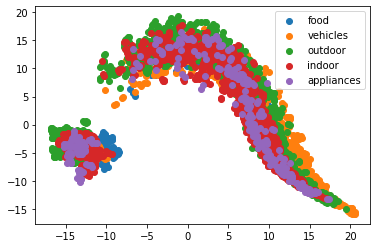

In [16]:
pca = PCA(2)
scaler = preprocessing.StandardScaler().fit(X)
X_2dim = pca.fit_transform(scaler.transform(X))

for l in df['target domain'].unique():
    plt.scatter(X_2dim[Y == l, 0], X_2dim[Y == l, 1], label=l)
plt.legend()
plt.show()

### Predict target domain from adapted hidden representation

In [21]:
# for step in np.arange(N_STEPS):

#     print(f'Step {step}')

#     X, Y = [], []

#     for _, row in df.iterrows():
#         X.append(eval(row[f'adapted h0 s{step}']))
#         Y.append(row['target domain'])

#     X, Y = np.array(X), np.array(Y)

#     print(train_and_classify(X, Y, CLF_TYPE))

#     pca = PCA(2)
#     scaler = preprocessing.StandardScaler().fit(X)
#     X_2dim = pca.fit_transform(scaler.transform(X))

#     for l in df['target domain'].unique():
#         plt.scatter(X_2dim[Y == l, 0], X_2dim[Y == l, 1], label=l)
#     plt.legend()
#     plt.show()

for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['target domain'])

    X, Y = np.array(X), np.array(Y)

    print(classify(X, Y, target_classifier, target_scaler))

#     pca = PCA(2)
#     scaler = preprocessing.StandardScaler().fit(X)
#     X_2dim = pca.fit_transform(scaler.transform(X))

#     for l in df['target domain'].unique():
#         plt.scatter(X_2dim[Y == l, 0], X_2dim[Y == l, 1], label=l)
#     plt.legend()
#     plt.show()

Step 0
              precision    recall  f1-score   support

  appliances       0.75      0.89      0.81       102
        food       0.89      0.89      0.89       123
      indoor       0.96      0.95      0.96       528
     outdoor       0.96      0.93      0.95       706
    vehicles       0.90      0.92      0.91       321

    accuracy                           0.93      1780
   macro avg       0.89      0.92      0.91      1780
weighted avg       0.94      0.93      0.93      1780

Step 1
              precision    recall  f1-score   support

  appliances       0.46      0.79      0.58       102
        food       0.74      0.77      0.75       123
      indoor       0.93      0.84      0.88       528
     outdoor       0.91      0.81      0.86       706
    vehicles       0.72      0.82      0.77       321

    accuracy                           0.82      1780
   macro avg       0.75      0.81      0.77      1780
weighted avg       0.84      0.82      0.83      1780

Step 2
 

### Predict listener domain from adapted hidden representation

In [22]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['listener domain'])

X, Y = np.array(X), np.array(Y)


print(classify(X, Y, target_classifier, target_scaler))

              precision    recall  f1-score   support

  appliances       0.00      0.00      0.00       899
        food       0.01      0.00      0.00       881
      indoor       0.00      0.00      0.00         0
     outdoor       0.00      0.00      0.00         0
    vehicles       0.00      0.00      0.00         0

    accuracy                           0.00      1780
   macro avg       0.00      0.00      0.00      1780
weighted avg       0.00      0.00      0.00      1780



/Users/mario/code/pb_speaker_adaptation/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mario/code/pb_speaker_adaptation/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mario/code/pb_speaker_adaptation/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [25]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['listener domain'])

X, Y = np.array(X), np.array(Y)


report, listener_classifier, listener_scaler = train_and_classify(X, Y, CLF_TYPE)
print(report)


              precision    recall  f1-score   support

  appliances       0.55      0.57      0.56       899
        food       0.54      0.53      0.54       881

    accuracy                           0.55      1780
   macro avg       0.55      0.55      0.55      1780
weighted avg       0.55      0.55      0.55      1780



In [26]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []
    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)
    
    print(classify(X, Y, listener_classifier, listener_scaler))
#     print(train_and_classify(X, Y, CLF_TYPE))

Step 0
              precision    recall  f1-score   support

  appliances       0.55      0.55      0.55       899
        food       0.54      0.54      0.54       881

    accuracy                           0.54      1780
   macro avg       0.54      0.54      0.54      1780
weighted avg       0.54      0.54      0.54      1780

Step 1
              precision    recall  f1-score   support

  appliances       0.53      0.54      0.53       899
        food       0.52      0.52      0.52       881

    accuracy                           0.53      1780
   macro avg       0.53      0.53      0.53      1780
weighted avg       0.53      0.53      0.53      1780

Step 2
              precision    recall  f1-score   support

  appliances       0.53      0.52      0.53       899
        food       0.52      0.52      0.52       881

    accuracy                           0.52      1780
   macro avg       0.52      0.52      0.52      1780
weighted avg       0.52      0.52      0.52      1780

### Predict listener domain from difference between adapted and non-adapted hidden representation

In [29]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []
    for _, row in df.iterrows():
        X.append(np.array(eval(row[f'adapted h0 s{step}'])) - np.array(eval(row['original h0'])))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)

    print(train_and_classify(X, Y, CLF_TYPE))

Step 0
              precision    recall  f1-score   support

  appliances       0.59      0.63      0.61       899
        food       0.59      0.55      0.57       881

    accuracy                           0.59      1780
   macro avg       0.59      0.59      0.59      1780
weighted avg       0.59      0.59      0.59      1780

Step 1
              precision    recall  f1-score   support

  appliances       0.62      0.66      0.64       899
        food       0.62      0.58      0.60       881

    accuracy                           0.62      1780
   macro avg       0.62      0.62      0.62      1780
weighted avg       0.62      0.62      0.62      1780

Step 2
              precision    recall  f1-score   support

  appliances       0.65      0.69      0.67       899
        food       0.66      0.62      0.64       881

    accuracy                           0.66      1780
   macro avg       0.66      0.66      0.66      1780
weighted avg       0.66      0.66      0.66      1780

## Diagnostic clustering

In [30]:
def cluster_and_plot(X, Y, k=5):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    Y_pred = kmeans.labels_
    # print(Y)

    print(f'Adjusted rand score: {adjusted_rand_score(Y_pred, Y)}')

    pca = PCA(2)
    X_2dim = pca.fit_transform(X)
    labels = np.unique(Y_pred)

    for i in labels:
        plt.scatter(X_2dim[Y_pred == i, 0], X_2dim[Y_pred == i, 1], label=i)
    plt.legend()
    plt.show()

    return kmeans, plt

### Cluster non-adapted hidden representations (vs. target domains)

Adjusted rand score: 0.05516088208204023


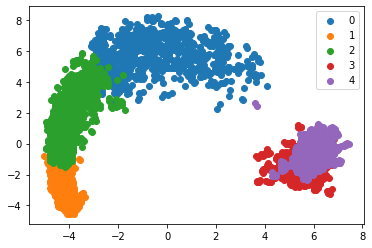

(KMeans(n_clusters=5, random_state=1),
 <module 'matplotlib.pyplot' from '/Users/mario/code/pb_speaker_adaptation/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>)

In [31]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['target domain'])

X, Y = np.array(X), np.array(Y)

cluster_and_plot(X, Y)

### Cluster adapted hidden representations (vs. target domains)



Step 0
Adjusted rand score: 0.054976624567613125


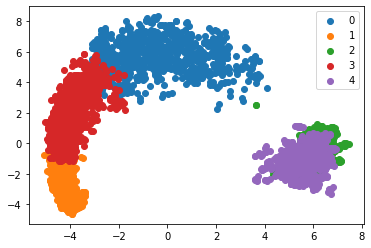

Step 1
Adjusted rand score: 0.055128449025249805


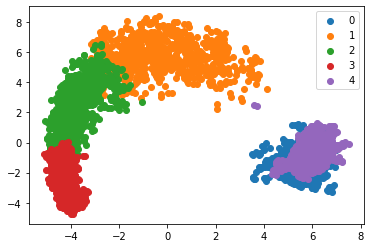

Step 2
Adjusted rand score: 0.05561694799166947


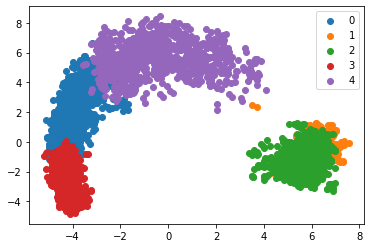

Step 3
Adjusted rand score: 0.05443814923456536


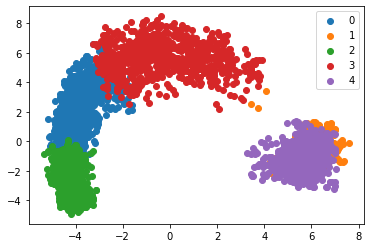

Step 4
Adjusted rand score: 0.054190991581382


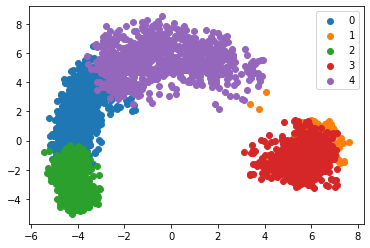

In [32]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['target domain'])

    X, Y = np.array(X), np.array(Y)

    cluster_and_plot(X, Y)

### Cluster adapted hidden representations (vs. listener domains)


Step 0
Adjusted rand score: -7.899621639794642e-05


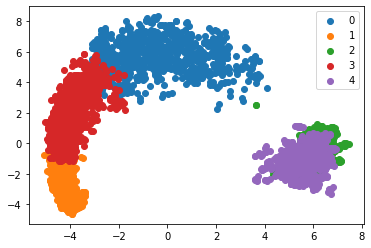

Step 1
Adjusted rand score: -0.00011223809648000026


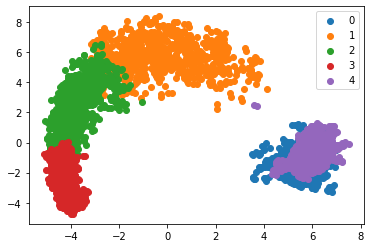

Step 2
Adjusted rand score: -0.00011739057738652306


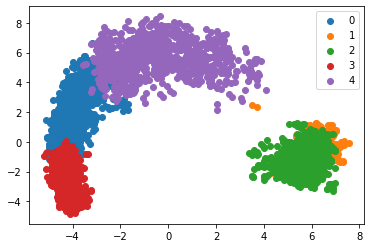

Step 3
Adjusted rand score: -8.780058195291913e-05


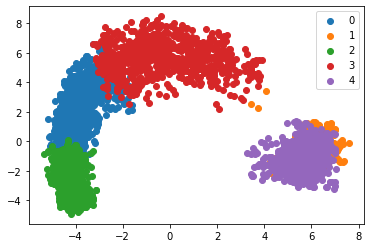

Step 4
Adjusted rand score: -0.00012709378246791923


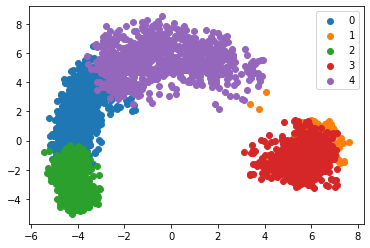

In [33]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)

    cluster_and_plot(X, Y)

### Cluster difference between adapted and non-adapted hidden representations (vs. listener domains)


Step 0
Adjusted rand score: 0.1583703553065098


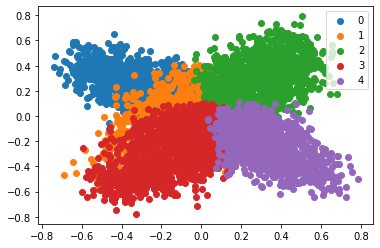

Step 1
Adjusted rand score: 0.16353987293064698


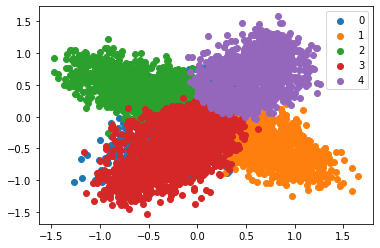

Step 2
Adjusted rand score: 0.18698333566907385


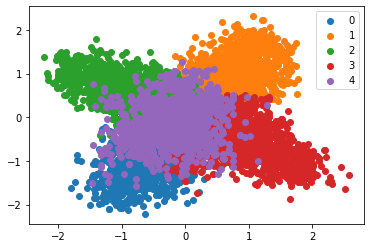

Step 3
Adjusted rand score: 0.18392343229579508


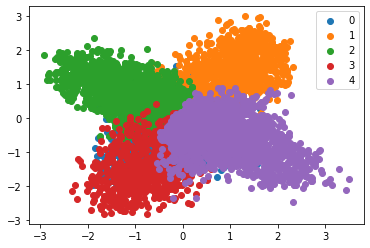

Step 4
Adjusted rand score: 0.18327513402631265


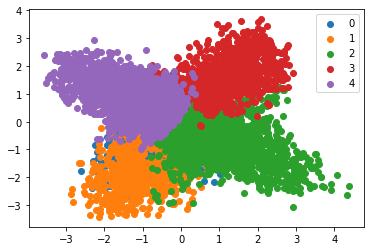

In [34]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(np.array(eval(row[f'adapted h0 s{step}'])) - np.array(eval(row['original h0'])))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)

    cluster_and_plot(X, Y)